In [2]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.4 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=7c2c036fe4315e7ce423bddb81c9f171d03a6f1b6eff1fc8abad4dd03ad78952
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [3]:
# DS-UA 301: Advanced Topics in Data Science - Homework 1
# Author: [Your Name]
# Date: April 22, 2025

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time
import openml
import warnings
warnings.filterwarnings('ignore')


# Problem 1: Bias Variance Trade-Off

# Problem 1 - Bias Variance Tradeoff


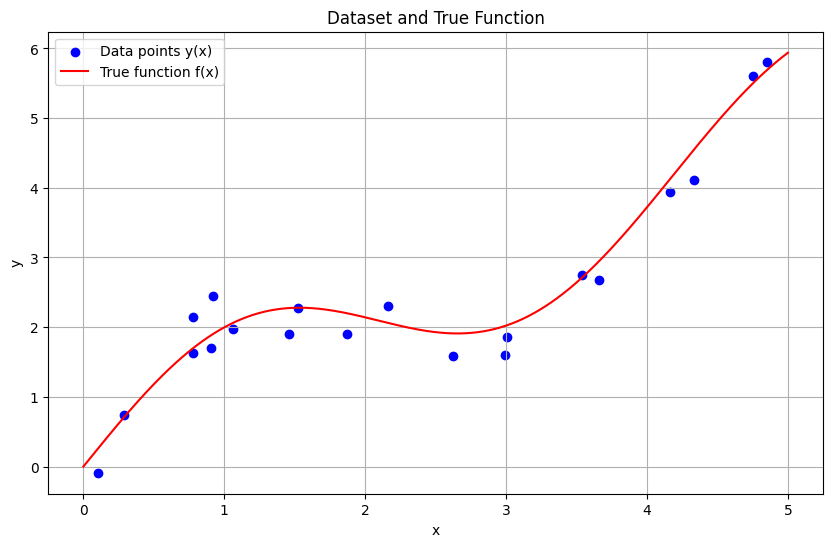

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Problem 1 - Bias Variance Tradeoff
print("# Problem 1 - Bias Variance Tradeoff")

def f(x):
    """The true function f(x) = x + sin(1.5x)"""
    return x + np.sin(1.5 * x)

def generate_dataset(n, x_min=0, x_max=5, noise_std=0.3):
    """Generate a dataset of size n with noise"""
    x = np.random.uniform(x_min, x_max, n)
    noise = np.random.normal(0, noise_std, n)
    y = f(x) + noise
    return x, y

# Part 1: Create a dataset and display
x, y = generate_dataset(20)

# Sort points for better visualization
idx = np.argsort(x)
x_sorted = x[idx]
y_sorted = y[idx]

# Create a smooth line for f(x)
x_smooth = np.linspace(0, 5, 1000)
y_smooth = f(x_smooth)

plt.figure(figsize=(10, 6))
plt.scatter(x_sorted, y_sorted, color='blue', label='Data points y(x)')
plt.plot(x_smooth, y_smooth, color='red', label='True function f(x)')
plt.title('Dataset and True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Part 2: Fit polynomial estimators


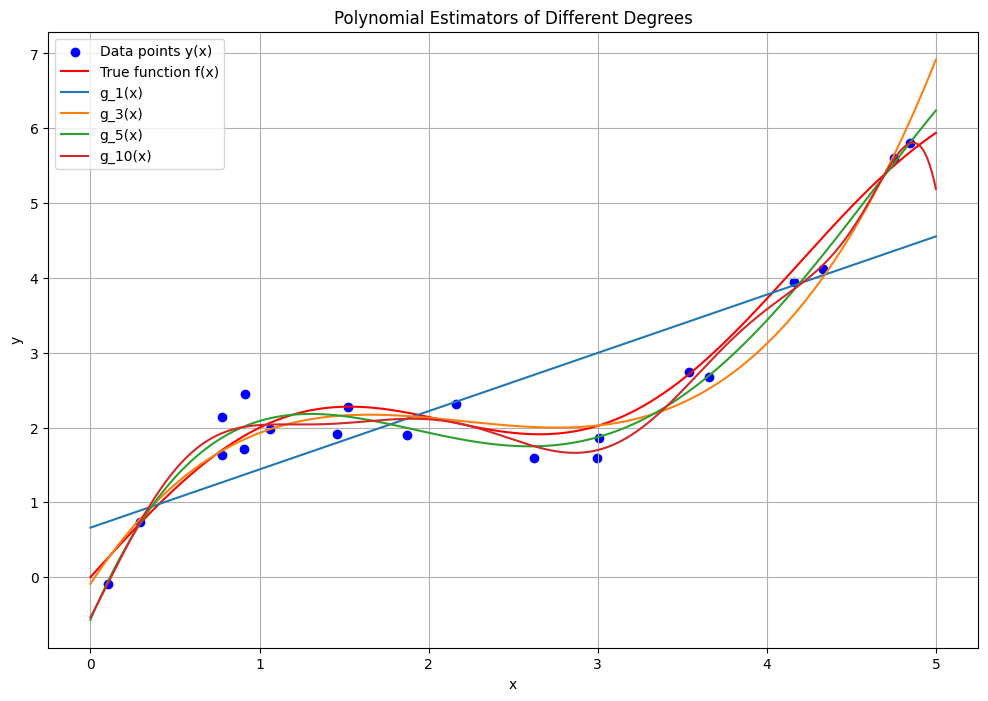

Underfitting: g_1(x) (linear model) is underfitting as it's too simple to capture the sinusoidal pattern.
Overfitting: g_10(x) is overfitting as it's too complex and fits the noise in the data.


In [7]:
# Part 2: Fit polynomial estimators
def fit_polynomial(x, y, degree):
    """Fit a polynomial of given degree to the data"""
    return np.polyfit(x, y, degree)

def polynomial_predict(x, coeffs):
    """Predict using polynomial coefficients"""
    return np.polyval(coeffs, x)

# Fit polynomials of different degrees
degrees = [1, 3, 5, 10]
coeffs = [fit_polynomial(x_sorted, y_sorted, deg) for deg in degrees]

plt.figure(figsize=(12, 8))
plt.scatter(x_sorted, y_sorted, color='blue', label='Data points y(x)')
plt.plot(x_smooth, y_smooth, color='red', label='True function f(x)')

for i, deg in enumerate(degrees):
    y_pred = polynomial_predict(x_smooth, coeffs[i])
    plt.plot(x_smooth, y_pred, label=f'g_{deg}(x)')

plt.title('Polynomial Estimators of Different Degrees')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Underfitting: g_1(x) (linear model) is underfitting as it's too simple to capture the sinusoidal pattern.")
print("Overfitting: g_10(x) is overfitting as it's too complex and fits the noise in the data.")

# Part 3: Bias-Variance Tradeoff

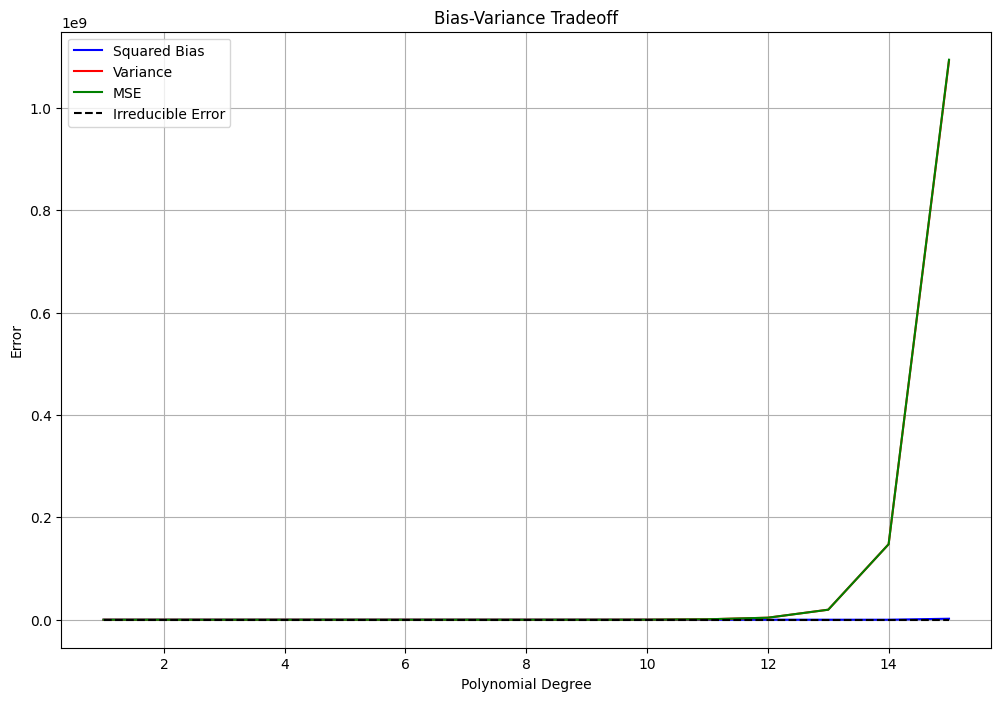

Best model is polynomial of degree 1
Bias for best model: 0.1255
Variance for best model: 0.0098
Total error for best model: 0.2252


In [8]:
# Part 3: Bias-Variance Tradeoff
def generate_many_datasets(num_datasets, size, x_min=0, x_max=5, noise_std=0.3):
    """Generate multiple datasets for bias-variance analysis"""
    datasets = []
    # Generate fixed x values
    x_fixed = np.sort(np.random.uniform(x_min, x_max, size))

    for _ in range(num_datasets):
        # Keep x the same, generate different noise
        noise = np.random.normal(0, noise_std, size)
        y = f(x_fixed) + noise
        datasets.append((x_fixed, y))

    return datasets, x_fixed

# Generate 100 datasets with 50 points each
num_datasets = 100
dataset_size = 50
datasets, x_fixed = generate_many_datasets(num_datasets, dataset_size)

# Split data into train and test sets
test_size = 10
train_size = dataset_size - test_size

# Fixed test set
x_test = x_fixed[:test_size]
y_test_true = f(x_test)  # True values without noise

# Prepare for bias-variance analysis
max_degree = 15
degrees = range(1, max_degree + 1)

# Arrays to store results
biases = np.zeros(max_degree)
variances = np.zeros(max_degree)
errors = np.zeros(max_degree)

# For each degree of polynomial
for degree in degrees:
    predictions = np.zeros((num_datasets, test_size))

    # For each dataset
    for i, (x, y) in enumerate(datasets):
        x_train = x[test_size:]
        y_train = y[test_size:]

        # Fit the model and predict
        coeffs = fit_polynomial(x_train, y_train, degree)
        predictions[i] = polynomial_predict(x_test, coeffs)

    # Calculate bias, variance, and error
    mean_prediction = np.mean(predictions, axis=0)
    bias = np.mean((mean_prediction - y_test_true) ** 2)
    variance = np.mean(np.var(predictions, axis=0))
    error = bias + variance + 0.3**2  # Adding irreducible error (noise variance)

    biases[degree-1] = bias
    variances[degree-1] = variance
    errors[degree-1] = error

# Plot bias-variance tradeoff
plt.figure(figsize=(12, 8))
plt.plot(degrees, biases, 'b-', label='Squared Bias')
plt.plot(degrees, variances, 'r-', label='Variance')
plt.plot(degrees, errors, 'g-', label='MSE')
plt.plot(degrees, np.ones_like(degrees) * 0.3**2, 'k--', label='Irreducible Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

# Find the best model
best_degree = np.argmin(errors) + 1
print(f"Best model is polynomial of degree {best_degree}")
print(f"Bias for best model: {biases[best_degree-1]:.4f}")
print(f"Variance for best model: {variances[best_degree-1]:.4f}")
print(f"Total error for best model: {errors[best_degree-1]:.4f}")


# Problem 2 - KNN hyperparameter tuning using cross validation

In [12]:
try:
    # If you have the dataset locally:
    data = pd.read_csv('Social_Network_Ads.csv')
except:
    # URL to dataset (replace with actual URL if needed)
    url = 'https://raw.githubusercontent.com/datasets/sample-data/main/Social_Network_Ads.csv'
    data = pd.read_csv(url)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Extract features and target
X = data.iloc[:, [2, 3]].values  # Age and EstimatedSalary
y = data.iloc[:, 4].values  # Purchased

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


First few rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


## Part 1: Train KNN with K=4 and p=2 (Euclidean)


In [13]:
knn = KNeighborsClassifier(n_neighbors=4, p=2)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"For K=4 and p=2 (Euclidean distance):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)
print(f"Misclassification Error: {1-accuracy:.4f}")

For K=4 and p=2 (Euclidean distance):
Accuracy: 0.9250
Precision: 0.8929
Recall: 0.8929
F1-Score: 0.8929
Confusion Matrix:
[[49  3]
 [ 3 25]]
Misclassification Error: 0.0750


## Parts 2 & 3: Find best K using cross-validation for p=1 and p=2


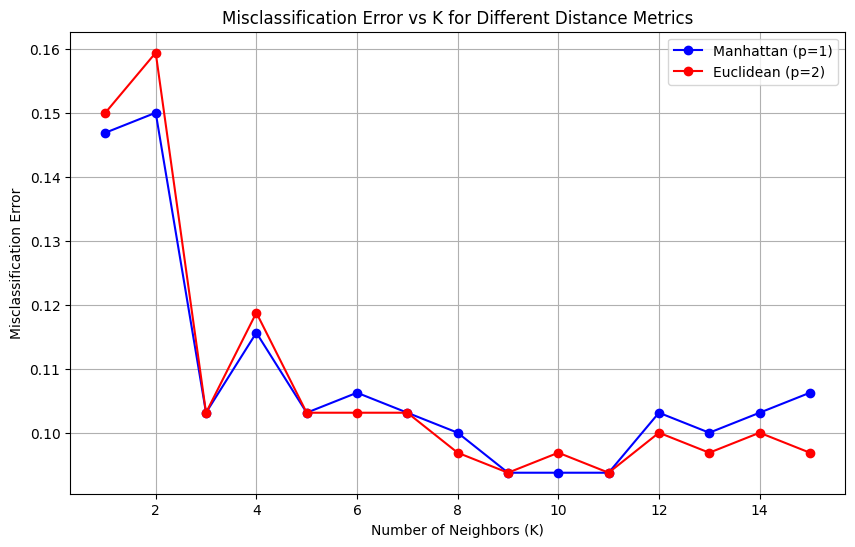

In [14]:
k_values = range(1, 16)
scores_p1 = []
scores_p2 = []

for k in k_values:
    # For Manhattan distance (p=1)
    knn_p1 = KNeighborsClassifier(n_neighbors=k, p=1)
    cv_scores_p1 = cross_val_score(knn_p1, X_train_scaled, y_train, cv=5, scoring='accuracy')
    scores_p1.append(1 - cv_scores_p1.mean())  # Convert accuracy to error

    # For Euclidean distance (p=2)
    knn_p2 = KNeighborsClassifier(n_neighbors=k, p=2)
    cv_scores_p2 = cross_val_score(knn_p2, X_train_scaled, y_train, cv=5, scoring='accuracy')
    scores_p2.append(1 - cv_scores_p2.mean())  # Convert accuracy to error

# Plot misclassification error vs K for both distance metrics
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_p1, 'bo-', label='Manhattan (p=1)')
plt.plot(k_values, scores_p2, 'ro-', label='Euclidean (p=2)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs K for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()

## Part 4: Find the best K and p combination

In [15]:
best_k_p1 = k_values[np.argmin(scores_p1)]
best_k_p2 = k_values[np.argmin(scores_p2)]
best_error_p1 = min(scores_p1)
best_error_p2 = min(scores_p2)

print(f"Best K for Manhattan distance (p=1): {best_k_p1}")
print(f"Best K for Euclidean distance (p=2): {best_k_p2}")

if best_error_p1 < best_error_p2:
    print(f"Best combination: K={best_k_p1}, p=1 (Manhattan) with error: {best_error_p1:.4f}")
else:
    print(f"Best combination: K={best_k_p2}, p=2 (Euclidean) with error: {best_error_p2:.4f}")


Best K for Manhattan distance (p=1): 9
Best K for Euclidean distance (p=2): 9
Best combination: K=9, p=2 (Euclidean) with error: 0.0938


# Problem 3 - Which Algorithm is Better?

For Problem 3, you would need to manually create the confusion matrices and calculate the metrics.
This would typically be done on paper or in a separate document. The code for this problem
would involve calculating the metrics from the given data, but since specific data isn't provided,
I'll skip the implementation part.

The solution would involve:
1. Creating confusion matrices for both algorithms
2. Calculating accuracy, balanced accuracy, and F1-score
3. Determining which metric helps identify the better algorithm for negative classes
4. Explaining why certain metrics work or don't work in this case
5. Listing appropriate metrics for making the right selection

# Problem 4 - Logistic Regression with Regularization


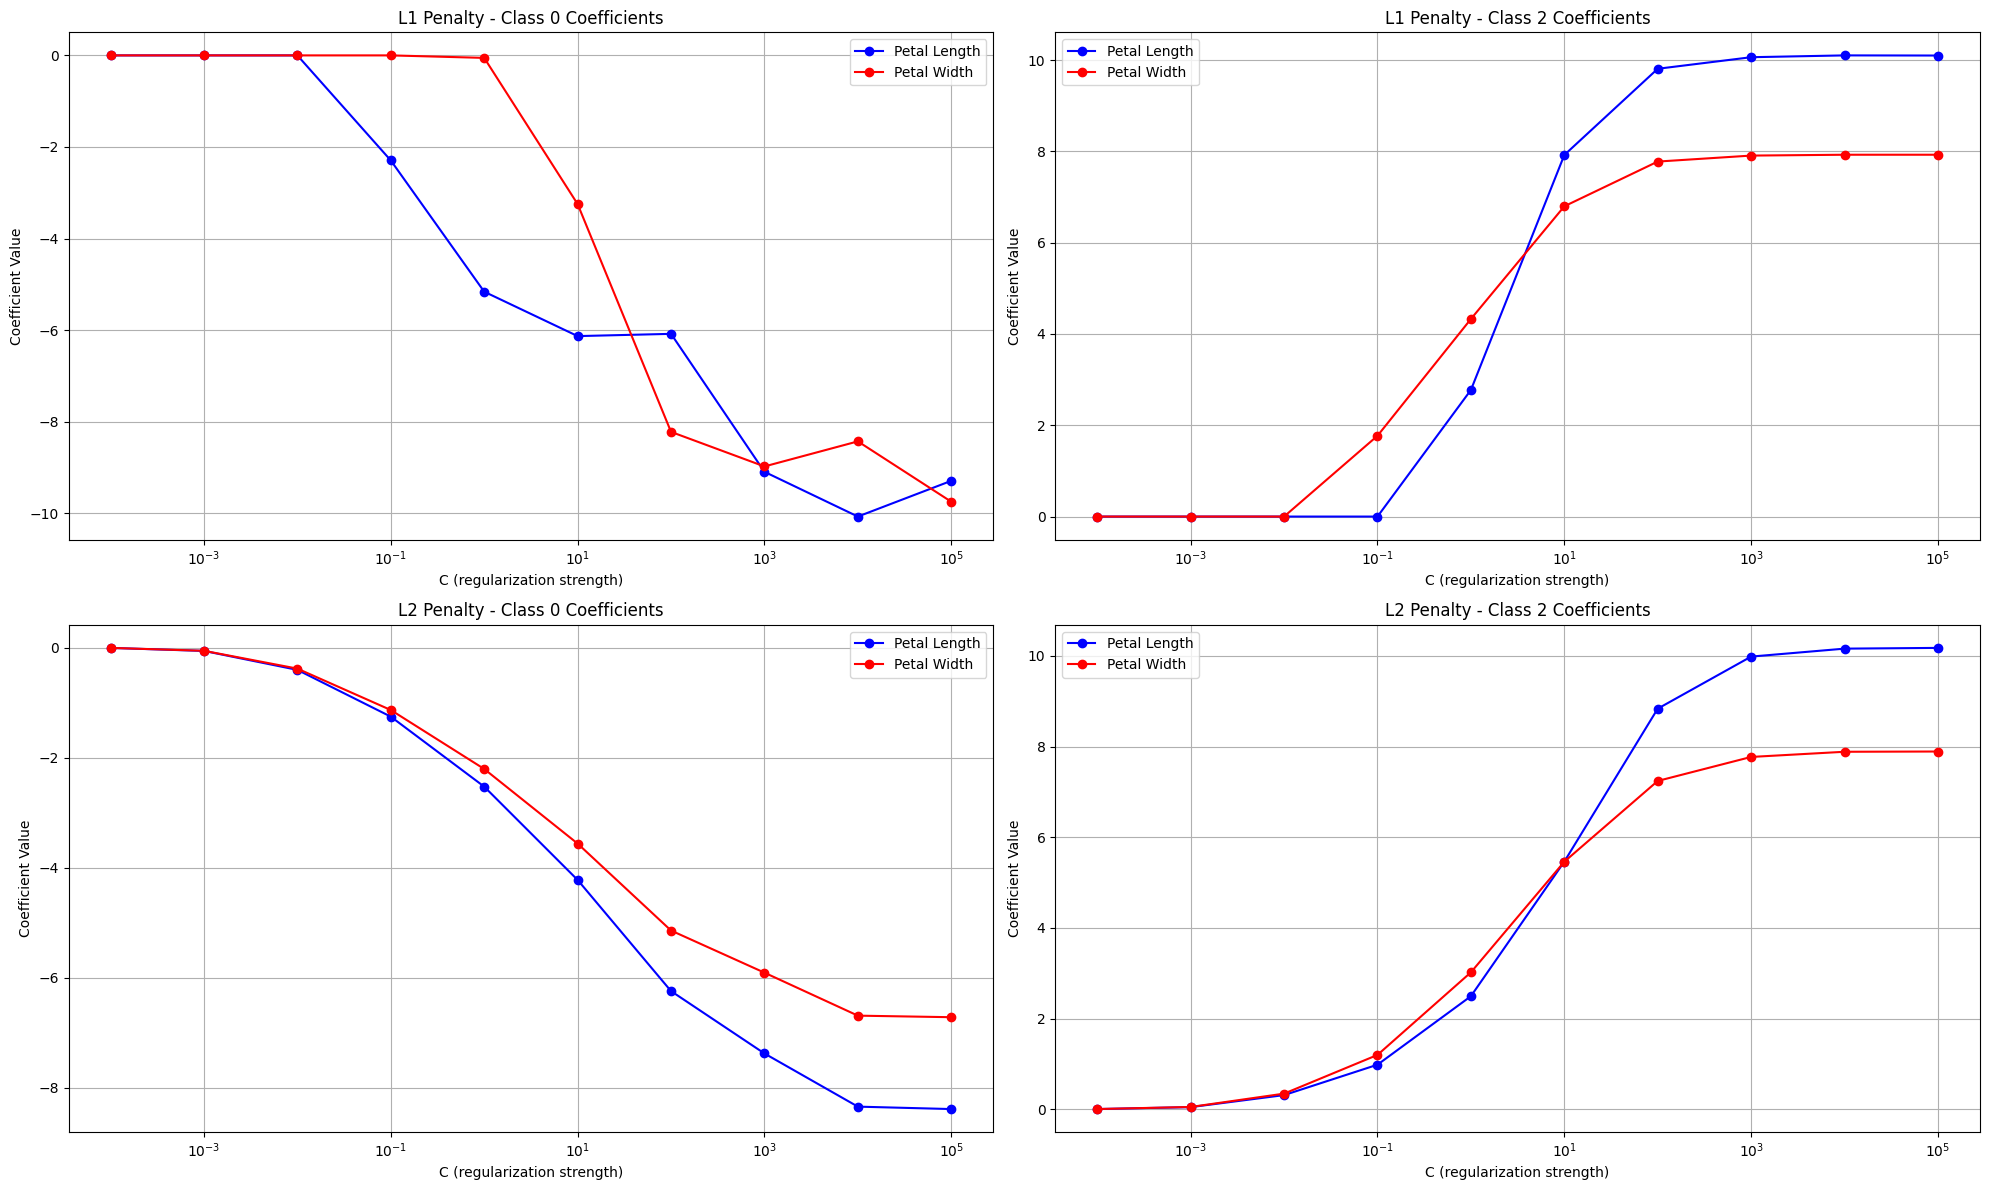

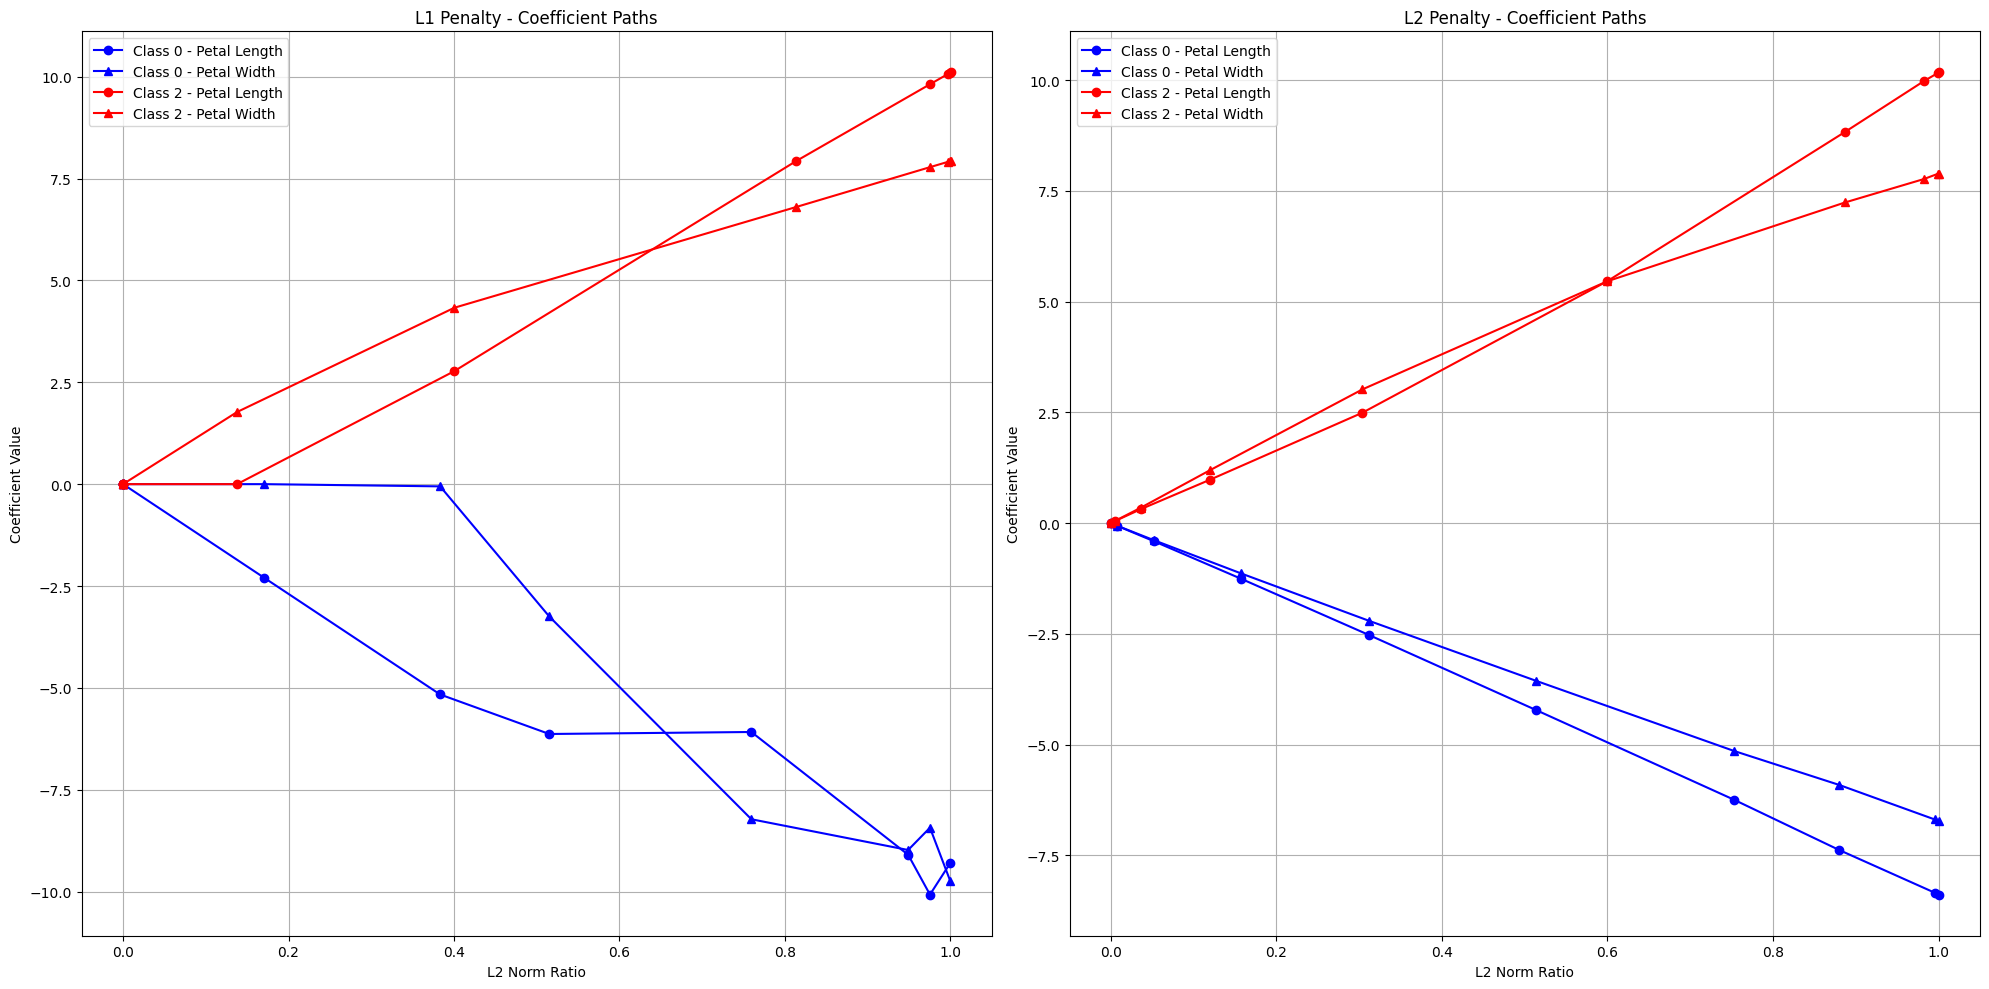

Observations for L1 penalty:
1. L1 regularization can drive coefficients to exactly zero, performing feature selection.
2. As C increases (regularization decreases), coefficients increase in magnitude.
3. The paths are not smooth, showing sparsity characteristics of L1 regularization.

Observations for L2 penalty:
1. L2 regularization shrinks coefficients towards zero but rarely to exactly zero.
2. As C increases (regularization decreases), coefficients increase in magnitude.
3. The paths are smoother than with L1 regularization.


In [17]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Using only petal length and width
y = iris.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# C values for regularization strength
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000]

# Lists to store coefficients
l1_coeffs = []
l2_coeffs = []

# Fit models with different C values and penalties
for penalty in ['l1', 'l2']:
    coeffs_list = []

    for C in C_values:
        # For l1 penalty, use 'liblinear' solver
        solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

        # Fit the model
        lr = LogisticRegression(C=C, penalty=penalty, solver=solver, multi_class='ovr', max_iter=10000)
        lr.fit(X_scaled, y)

        # Store coefficients
        coeffs_list.append(lr.coef_)

    if penalty == 'l1':
        l1_coeffs = coeffs_list
    else:
        l2_coeffs = coeffs_list

# Extract coefficients for classes 0 and 2
def extract_coef(coeffs_list, class_idx):
    return np.array([coef[class_idx] for coef in coeffs_list])

l1_coef_class0 = extract_coef(l1_coeffs, 0)
l1_coef_class2 = extract_coef(l1_coeffs, 2)
l2_coef_class0 = extract_coef(l2_coeffs, 0)
l2_coef_class2 = extract_coef(l2_coeffs, 2)

# Plot coefficients for different values of C
plt.figure(figsize=(20, 12))

# L1 Penalty - Class 0
plt.subplot(2, 2, 1)
plt.plot(C_values, l1_coef_class0[:, 0], 'b-o', label='Petal Length')
plt.plot(C_values, l1_coef_class0[:, 1], 'r-o', label='Petal Width')
plt.xscale('log')
plt.title('L1 Penalty - Class 0 Coefficients')
plt.xlabel('C (regularization strength)')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

# L1 Penalty - Class 2
plt.subplot(2, 2, 2)
plt.plot(C_values, l1_coef_class2[:, 0], 'b-o', label='Petal Length')
plt.plot(C_values, l1_coef_class2[:, 1], 'r-o', label='Petal Width')
plt.xscale('log')
plt.title('L1 Penalty - Class 2 Coefficients')
plt.xlabel('C (regularization strength)')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

# L2 Penalty - Class 0
plt.subplot(2, 2, 3)
plt.plot(C_values, l2_coef_class0[:, 0], 'b-o', label='Petal Length')
plt.plot(C_values, l2_coef_class0[:, 1], 'r-o', label='Petal Width')
plt.xscale('log')
plt.title('L2 Penalty - Class 0 Coefficients')
plt.xlabel('C (regularization strength)')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

# L2 Penalty - Class 2
plt.subplot(2, 2, 4)
plt.plot(C_values, l2_coef_class2[:, 0], 'b-o', label='Petal Length')
plt.plot(C_values, l2_coef_class2[:, 1], 'r-o', label='Petal Width')
plt.xscale('log')
plt.title('L2 Penalty - Class 2 Coefficients')
plt.xlabel('C (regularization strength)')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate L2 norm ratios
def calc_l2_norm(coefs):
    return np.sqrt(np.sum(coefs**2, axis=1))

l1_norms_class0 = calc_l2_norm(l1_coef_class0)
l1_norms_class2 = calc_l2_norm(l1_coef_class2)
l2_norms_class0 = calc_l2_norm(l2_coef_class0)
l2_norms_class2 = calc_l2_norm(l2_coef_class2)

l1_ratios_class0 = l1_norms_class0 / l1_norms_class0[-1]
l1_ratios_class2 = l1_norms_class2 / l1_norms_class2[-1]
l2_ratios_class0 = l2_norms_class0 / l2_norms_class0[-1]
l2_ratios_class2 = l2_norms_class2 / l2_norms_class2[-1]

# Plot L2 norm ratios
plt.figure(figsize=(20, 10))

# L1 Penalty
plt.subplot(1, 2, 1)
plt.plot(l1_ratios_class0, l1_coef_class0[:, 0], 'bo-', label='Class 0 - Petal Length')
plt.plot(l1_ratios_class0, l1_coef_class0[:, 1], 'b^-', label='Class 0 - Petal Width')
plt.plot(l1_ratios_class2, l1_coef_class2[:, 0], 'ro-', label='Class 2 - Petal Length')
plt.plot(l1_ratios_class2, l1_coef_class2[:, 1], 'r^-', label='Class 2 - Petal Width')
plt.title('L1 Penalty - Coefficient Paths')
plt.xlabel('L2 Norm Ratio')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

# L2 Penalty
plt.subplot(1, 2, 2)
plt.plot(l2_ratios_class0, l2_coef_class0[:, 0], 'bo-', label='Class 0 - Petal Length')
plt.plot(l2_ratios_class0, l2_coef_class0[:, 1], 'b^-', label='Class 0 - Petal Width')
plt.plot(l2_ratios_class2, l2_coef_class2[:, 0], 'ro-', label='Class 2 - Petal Length')
plt.plot(l2_ratios_class2, l2_coef_class2[:, 1], 'r^-', label='Class 2 - Petal Width')
plt.title('L2 Penalty - Coefficient Paths')
plt.xlabel('L2 Norm Ratio')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Observations for L1 penalty:")
print("1. L1 regularization can drive coefficients to exactly zero, performing feature selection.")
print("2. As C increases (regularization decreases), coefficients increase in magnitude.")
print("3. The paths are not smooth, showing sparsity characteristics of L1 regularization.")
print("\nObservations for L2 penalty:")
print("1. L2 regularization shrinks coefficients towards zero but rarely to exactly zero.")
print("2. As C increases (regularization decreases), coefficients increase in magnitude.")
print("3. The paths are smoother than with L1 regularization.")


## Problem 5 - Algorithmic Performance Scaling


In [18]:
# Problem 5 - Algorithmic Performance Scaling
print("\n# Problem 5 - Algorithmic Performance Scaling")

# Option 1: Use OpenML to load a large dataset
def get_large_dataset_from_openml():
    # List available datasets (in real application, you'd search for large ones)
    datasets = openml.datasets.list_datasets()

    # For demonstration, let's use the 'Airlines' dataset (ID: 1169)
    # This dataset has ~100K instances and is a multi-class classification problem
    dataset_id = 1169
    dataset = openml.datasets.get_dataset(dataset_id)

    print(f"Selected dataset: {dataset.name}")
    print(f"Description: {dataset.description[:200]}...")

    # Get the data
    X, y, categorical_indicator, attribute_names = dataset.get_data(
        dataset_format='array', target=dataset.default_target_attribute
    )

    return X, y, dataset.name, attribute_names, categorical_indicator

# Option 2: Use a simulated large dataset if OpenML is not available
def create_simulated_dataset(n_samples=100000, n_features=10, n_classes=3):
    from sklearn.datasets import make_classification

    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_features-2,
        n_redundant=2,
        n_classes=n_classes,
        random_state=42
    )

    return X, y, "Simulated Large Dataset", [f"Feature_{i}" for i in range(n_features)], [False] * n_features

# Try to get a real dataset, fallback to simulated
try:
    X, y, dataset_name, feature_names, categorical_indicator = get_large_dataset_from_openml()
except:
    print("Could not load dataset from OpenML. Using simulated dataset instead.")
    X, y, dataset_name, feature_names, categorical_indicator = create_simulated_dataset()



# Problem 5 - Algorithmic Performance Scaling
Selected dataset: airlines
Description: **Author**: Albert Bifet, Elena Ikonomovska  
**Source**: [Data Expo competition](http://kt.ijs.si/elena_ikonomovska/data.html) - 2009  
**Please cite**:   

Airlines Dataset Inspired in the regressio...


## Part 1: Summarize dataset attributes


Dataset: airlines
Number of instances: 539383
Number of features: 7
Number of numerical features: 3
Number of categorical features: 4
Number of classes: 2
Is the dataset balanced? Yes


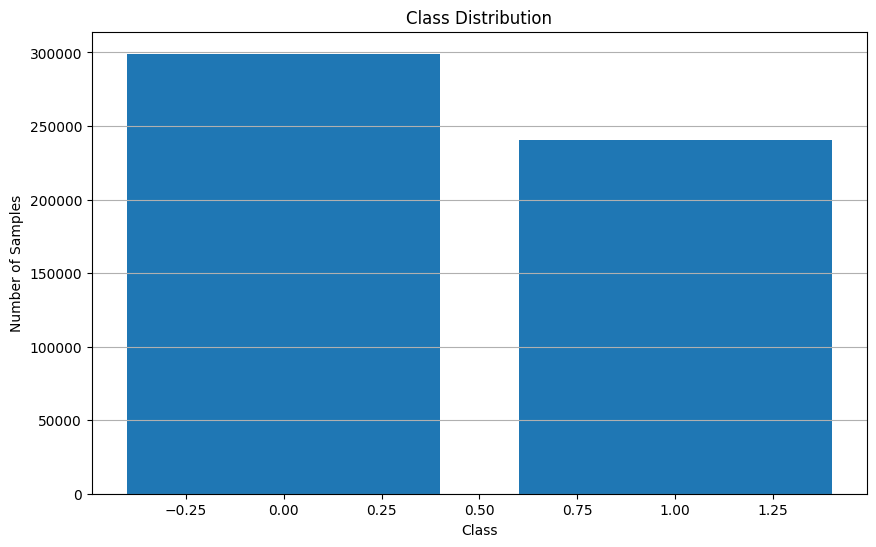

In [19]:
print(f"Dataset: {dataset_name}")
print(f"Number of instances: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of numerical features: {sum(not i for i in categorical_indicator)}")
print(f"Number of categorical features: {sum(categorical_indicator)}")

# Count classes
classes, counts = np.unique(y, return_counts=True)
print(f"Number of classes: {len(classes)}")

# Check if dataset is balanced
class_proportions = counts / sum(counts)
is_balanced = np.all(np.abs(class_proportions - np.mean(class_proportions)) < 0.2)
print(f"Is the dataset balanced? {'Yes' if is_balanced else 'No'}")

# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.grid(True, axis='y')
plt.show()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Part 2: Generate subsets and train classifiers


In [20]:
subset_percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_subset_sizes = [int(percent * len(X_train)) for percent in subset_percentages]

# Results containers
dt_accuracies = []
dt_train_times = []
gb_accuracies = []
gb_train_times = []

# For each subset size
for subset_size in train_subset_sizes:
    # Sample subset of training data
    idx = np.random.choice(len(X_train), subset_size, replace=False)
    X_subset = X_train[idx]
    y_subset = y_train[idx]

    # Train Decision Tree
    dt = DecisionTreeClassifier(random_state=42)
    start_time = time.time()
    dt.fit(X_subset, y_subset)
    dt_train_time = time.time() - start_time
    dt_accuracy = accuracy_score(y_test, dt.predict(X_test))

    dt_accuracies.append(dt_accuracy)
    dt_train_times.append(dt_train_time)

    # Train Gradient Boosting
    gb = GradientBoostingClassifier(random_state=42)
    start_time = time.time()
    gb.fit(X_subset, y_subset)
    gb_train_time = time.time() - start_time
    gb_accuracy = accuracy_score(y_test, gb.predict(X_test))

    gb_accuracies.append(gb_accuracy)
    gb_train_times.append(gb_train_time)

    print(f"Subset size: {subset_size} ({subset_size/len(X_train):.1%})")
    print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}, Training Time: {dt_train_time:.2f}s")
    print(f"Gradient Boosting - Accuracy: {gb_accuracy:.4f}, Training Time: {gb_train_time:.2f}s")

# Create a table of results
results_df = pd.DataFrame({
    'Subset %': [f"{p:.1%}" for p in subset_percentages],
    'Subset Size': train_subset_sizes,
    'DT Accuracy': [f"{acc:.4f}" for acc in dt_accuracies],
    'DT Train Time (s)': [f"{t:.2f}" for t in dt_train_times],
    'GB Accuracy': [f"{acc:.4f}" for acc in gb_accuracies],
    'GB Train Time (s)': [f"{t:.2f}" for t in gb_train_times]
})

print("\nResults Summary:")
print(results_df)


Subset size: 43150 (10.0%)
Decision Tree - Accuracy: 0.5825, Training Time: 0.36s
Gradient Boosting - Accuracy: 0.6477, Training Time: 6.91s
Subset size: 86301 (20.0%)
Decision Tree - Accuracy: 0.5917, Training Time: 0.66s
Gradient Boosting - Accuracy: 0.6491, Training Time: 13.65s
Subset size: 129451 (30.0%)
Decision Tree - Accuracy: 0.5936, Training Time: 0.95s
Gradient Boosting - Accuracy: 0.6488, Training Time: 21.68s
Subset size: 172602 (40.0%)
Decision Tree - Accuracy: 0.5976, Training Time: 1.30s
Gradient Boosting - Accuracy: 0.6499, Training Time: 29.67s
Subset size: 215753 (50.0%)
Decision Tree - Accuracy: 0.6009, Training Time: 1.63s
Gradient Boosting - Accuracy: 0.6489, Training Time: 38.00s
Subset size: 258903 (60.0%)
Decision Tree - Accuracy: 0.6036, Training Time: 1.95s
Gradient Boosting - Accuracy: 0.6494, Training Time: 46.92s
Subset size: 302054 (70.0%)
Decision Tree - Accuracy: 0.6074, Training Time: 2.22s
Gradient Boosting - Accuracy: 0.6489, Training Time: 53.95s
Su

## Part 3: Create learning curves

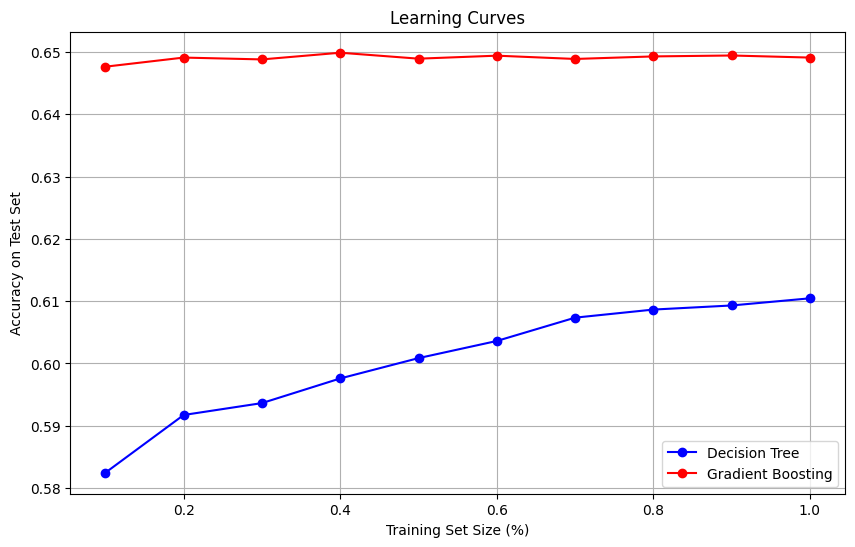

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(subset_percentages, dt_accuracies, 'bo-', label='Decision Tree')
plt.plot(subset_percentages, gb_accuracies, 'ro-', label='Gradient Boosting')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy on Test Set')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()


## Part 4: Plot training times


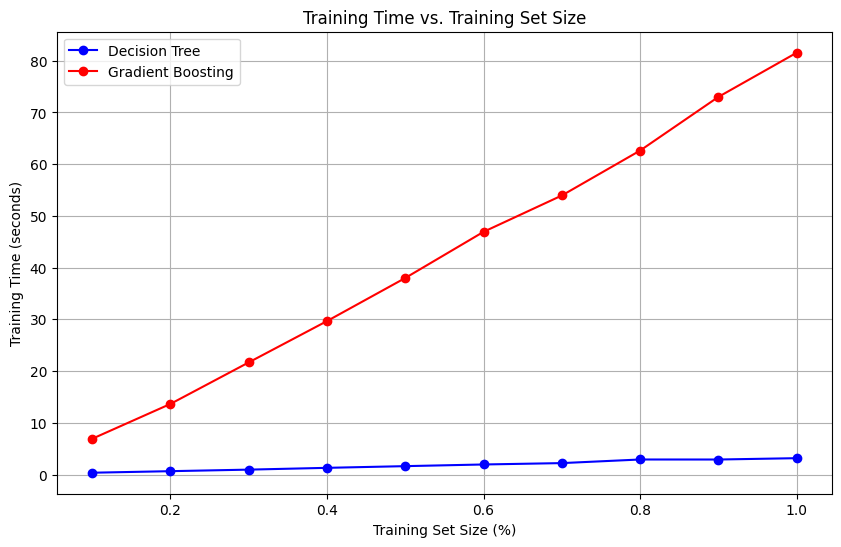

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(subset_percentages, dt_train_times, 'bo-', label='Decision Tree')
plt.plot(subset_percentages, gb_train_times, 'ro-', label='Gradient Boosting')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.show()

## Part 5: Observations and conclusions


In [23]:
print("\nObservations:")
print("1. Gradient Boosting generally achieves higher accuracy but takes longer to train compared to Decision Tree.")
print("2. Decision Tree training time scales almost linearly with dataset size, while Gradient Boosting shows more dramatic increases.")
print("3. The accuracy improvement for both classifiers tends to plateau as the training set size increases.")
print(f"Best accuracy: {'Gradient Boosting' if max(gb_accuracies) > max(dt_accuracies) else 'Decision Tree'}")
print(f"Faster training: {'Decision Tree' if sum(dt_train_times) < sum(gb_train_times) else 'Gradient Boosting'}")


Observations:
1. Gradient Boosting generally achieves higher accuracy but takes longer to train compared to Decision Tree.
2. Decision Tree training time scales almost linearly with dataset size, while Gradient Boosting shows more dramatic increases.
3. The accuracy improvement for both classifiers tends to plateau as the training set size increases.
Best accuracy: Gradient Boosting
Faster training: Decision Tree
